In [1]:
import itertools
import os

import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
INPUT_SIZE = 299

In [4]:
data_dir = '../data/crop/'
# data_dir = './crop/'

label_path = '../breeds.txt'
# label_path = './breeds.txt'

breeds = []
with open(label_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        breeds.append(line.replace('\n', ''))

print(len(breeds))

7


In [5]:
def load_img(img_path):
    """ load a image with (INPUT_SIZE, INPUT_SIZE)
    # returns: 
        RGB image as numpy array
    """
    img = image.load_img(img_path, target_size=(INPUT_SIZE, INPUT_SIZE))
    img = image.img_to_array(img)
    img /= 255
    
    return img

In [6]:
# load all images and labels
X = []
y = []
for breed in breeds:
    print(breed)
    index = breeds.index(breed)
    imgs = os.listdir(data_dir + breed + '/')
    for img in imgs:
        img_path = data_dir + breed + '/' + img
        X.append(load_img(img_path))
        y.append(index)

border_collie
chihuahua
golden_retriever
pembroke
pomeranian
pug
toy_poodle


In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
y = np_utils.to_categorical(y)
print(X.shape, y.shape)

(605, 299, 299, 3) (605, 7)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(423, 299, 299, 3) (423, 7) (182, 299, 299, 3) (182, 7)


In [11]:
# data augmentation
train_datagen = ImageDataGenerator(rotation_range=30, 
                                   zoom_range = 0.1, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(X_train, y_train, shuffle=False, batch_size=10, seed=10)

In [12]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [13]:
""" transfer learning """
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(len(breeds), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=prediction)

for layer in base_model.layers:
    layer.trainable=False

In [14]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 35, 35, 256)  0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 35, 35, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 35, 35, 64)   192         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 35, 35, 64)   192         conv2d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 35, 35, 64)   192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 35, 35, 96)   288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 35, 35, 64)   192         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 35, 35, 64)   0           batch_normalization_20[0][0]     
__________

batch_normalization_38 (BatchNo (None, 17, 17, 128)  384         conv2d_38[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 17, 17, 128)  0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 17, 17, 128)  0           batch_normalization_38[0][0]     
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, 17, 17, 768)  0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 17, 17, 192)  147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_34 

__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 17, 17, 192)  576         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 17, 17, 192)  576         conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 17, 17, 192)  576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, 17, 17, 192)  576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 17, 17, 192)  0           batch_normalization_41[0][0]     
__________

activation_60 (Activation)      (None, 17, 17, 192)  0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 17, 17, 768)  0           activation_51[0][0]              
                                                                 activation_54[0][0]              
                                                                 activation_59[0][0]              
                                                                 activation_60[0][0]              
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 17, 17, 192)  147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 17, 17, 192)  576         conv2d_65[0][0]                  
__________

batch_normalization_74 (BatchNo (None, 17, 17, 192)  576         conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 17, 17, 192)  0           batch_normalization_74[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 17, 17, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 17, 17, 192)  258048      activation_74[0][0]              
__________________________________________________________________________________________________
batch_normalization_71 (BatchNo (None, 17, 17, 192)  576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_84 (Activation)      (None, 8, 8, 384)    0           batch_normalization_84[0][0]     
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 8, 8, 192)    576         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, 8, 8, 320)    0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 8, 8, 768)    0           activation_79[0][0]              
                                                                 activation_80[0][0]              
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 8, 8, 768)    0           activation_83[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           mixed10[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          1049088     global_average_pooling2d_1[0][0] 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 7)            3591        dense_1[0][0]                    
Total params: 22,855,463
Trainable params: 1,052,679
Non-trainable params: 21,802,784
_______________________

In [16]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=175,
                              validation_data=(X_test, y_test),
                              validation_steps=44,
                              epochs=50,
                              verbose=1)

Epoch 1/50
175/175 [==============================] - ETA: 14:26 - loss: 2.2001 - acc: 0.0000e+ - ETA: 7:15 - loss: 2.0764 - acc: 0.0000e+00 - ETA: 4:52 - loss: 1.9945 - acc: 0.1000    - ETA: 3:40 - loss: 1.9854 - acc: 0.125 - ETA: 2:57 - loss: 1.9900 - acc: 0.160 - ETA: 2:28 - loss: 1.9996 - acc: 0.183 - ETA: 2:08 - loss: 2.0108 - acc: 0.185 - ETA: 1:52 - loss: 1.9807 - acc: 0.212 - ETA: 1:40 - loss: 1.9587 - acc: 0.211 - ETA: 1:31 - loss: 1.9244 - acc: 0.190 - ETA: 1:23 - loss: 1.8993 - acc: 0.200 - ETA: 1:16 - loss: 1.8650 - acc: 0.233 - ETA: 1:11 - loss: 1.8471 - acc: 0.238 - ETA: 1:06 - loss: 1.8314 - acc: 0.250 - ETA: 1:02 - loss: 1.8111 - acc: 0.266 - ETA: 58s - loss: 1.7968 - acc: 0.268 - ETA: 56s - loss: 1.7874 - acc: 0.27 - ETA: 54s - loss: 1.7791 - acc: 0.27 - ETA: 52s - loss: 1.7645 - acc: 0.28 - ETA: 51s - loss: 1.7483 - acc: 0.30 - ETA: 49s - loss: 1.7406 - acc: 0.30 - ETA: 48s - loss: 1.7295 - acc: 0.31 - ETA: 47s - loss: 1.7347 - acc: 0.31 - ETA: 46s - loss: 1.7135 - ac

175/175 [==============================] - ETA: 10s - loss: 0.3090 - acc: 0.90 - ETA: 10s - loss: 0.2689 - acc: 0.90 - ETA: 10s - loss: 0.3670 - acc: 0.83 - ETA: 10s - loss: 0.4386 - acc: 0.82 - ETA: 10s - loss: 0.4370 - acc: 0.84 - ETA: 10s - loss: 0.4336 - acc: 0.85 - ETA: 9s - loss: 0.4269 - acc: 0.8429 - ETA: 9s - loss: 0.3973 - acc: 0.862 - ETA: 9s - loss: 0.3769 - acc: 0.866 - ETA: 9s - loss: 0.3767 - acc: 0.870 - ETA: 9s - loss: 0.3784 - acc: 0.872 - ETA: 9s - loss: 0.3666 - acc: 0.883 - ETA: 9s - loss: 0.3741 - acc: 0.884 - ETA: 9s - loss: 0.3948 - acc: 0.878 - ETA: 9s - loss: 0.4241 - acc: 0.873 - ETA: 10s - loss: 0.4188 - acc: 0.88 - ETA: 11s - loss: 0.4121 - acc: 0.88 - ETA: 12s - loss: 0.4184 - acc: 0.87 - ETA: 13s - loss: 0.4289 - acc: 0.86 - ETA: 13s - loss: 0.4503 - acc: 0.86 - ETA: 14s - loss: 0.4392 - acc: 0.86 - ETA: 14s - loss: 0.4339 - acc: 0.87 - ETA: 15s - loss: 0.4321 - acc: 0.87 - ETA: 15s - loss: 0.4251 - acc: 0.87 - ETA: 16s - loss: 0.4206 - acc: 0.88 - ETA: 1

175/175 [==============================] - ETA: 10s - loss: 0.5118 - acc: 0.80 - ETA: 10s - loss: 0.4111 - acc: 0.80 - ETA: 10s - loss: 0.3613 - acc: 0.83 - ETA: 10s - loss: 0.4026 - acc: 0.82 - ETA: 10s - loss: 0.3406 - acc: 0.86 - ETA: 10s - loss: 0.3023 - acc: 0.88 - ETA: 11s - loss: 0.2944 - acc: 0.90 - ETA: 13s - loss: 0.3048 - acc: 0.90 - ETA: 15s - loss: 0.2844 - acc: 0.91 - ETA: 17s - loss: 0.2711 - acc: 0.92 - ETA: 18s - loss: 0.2819 - acc: 0.91 - ETA: 19s - loss: 0.2954 - acc: 0.90 - ETA: 20s - loss: 0.2925 - acc: 0.90 - ETA: 21s - loss: 0.2830 - acc: 0.91 - ETA: 22s - loss: 0.3034 - acc: 0.90 - ETA: 22s - loss: 0.3040 - acc: 0.90 - ETA: 22s - loss: 0.3310 - acc: 0.89 - ETA: 23s - loss: 0.3217 - acc: 0.90 - ETA: 23s - loss: 0.3301 - acc: 0.90 - ETA: 23s - loss: 0.3274 - acc: 0.90 - ETA: 23s - loss: 0.3165 - acc: 0.90 - ETA: 24s - loss: 0.3131 - acc: 0.90 - ETA: 24s - loss: 0.3327 - acc: 0.90 - ETA: 24s - loss: 0.3312 - acc: 0.90 - ETA: 24s - loss: 0.3373 - acc: 0.90 - ETA: 24

175/175 [==============================] - ETA: 10s - loss: 0.2807 - acc: 0.90 - ETA: 10s - loss: 0.1832 - acc: 0.95 - ETA: 10s - loss: 0.1509 - acc: 0.96 - ETA: 10s - loss: 0.1359 - acc: 0.97 - ETA: 10s - loss: 0.1189 - acc: 0.98 - ETA: 10s - loss: 0.1103 - acc: 0.98 - ETA: 10s - loss: 0.1052 - acc: 0.98 - ETA: 12s - loss: 0.1571 - acc: 0.96 - ETA: 14s - loss: 0.2124 - acc: 0.93 - ETA: 16s - loss: 0.2153 - acc: 0.93 - ETA: 17s - loss: 0.2149 - acc: 0.92 - ETA: 18s - loss: 0.2402 - acc: 0.91 - ETA: 19s - loss: 0.2419 - acc: 0.91 - ETA: 20s - loss: 0.2765 - acc: 0.91 - ETA: 21s - loss: 0.2665 - acc: 0.92 - ETA: 21s - loss: 0.2685 - acc: 0.91 - ETA: 22s - loss: 0.2624 - acc: 0.91 - ETA: 22s - loss: 0.2525 - acc: 0.92 - ETA: 22s - loss: 0.2484 - acc: 0.92 - ETA: 22s - loss: 0.2718 - acc: 0.92 - ETA: 23s - loss: 0.2653 - acc: 0.92 - ETA: 23s - loss: 0.2660 - acc: 0.92 - ETA: 23s - loss: 0.2646 - acc: 0.92 - ETA: 23s - loss: 0.2565 - acc: 0.92 - ETA: 23s - loss: 0.2573 - acc: 0.92 - ETA: 23

175/175 [==============================] - ETA: 10s - loss: 0.2918 - acc: 0.90 - ETA: 10s - loss: 0.2198 - acc: 0.90 - ETA: 10s - loss: 0.1614 - acc: 0.93 - ETA: 10s - loss: 0.1629 - acc: 0.92 - ETA: 10s - loss: 0.1808 - acc: 0.90 - ETA: 10s - loss: 0.2077 - acc: 0.90 - ETA: 10s - loss: 0.1908 - acc: 0.91 - ETA: 13s - loss: 0.1845 - acc: 0.92 - ETA: 15s - loss: 0.1846 - acc: 0.92 - ETA: 17s - loss: 0.2000 - acc: 0.91 - ETA: 18s - loss: 0.2326 - acc: 0.90 - ETA: 19s - loss: 0.2328 - acc: 0.90 - ETA: 20s - loss: 0.2547 - acc: 0.89 - ETA: 20s - loss: 0.2471 - acc: 0.90 - ETA: 21s - loss: 0.2357 - acc: 0.90 - ETA: 22s - loss: 0.2335 - acc: 0.91 - ETA: 22s - loss: 0.2648 - acc: 0.90 - ETA: 22s - loss: 0.2602 - acc: 0.90 - ETA: 22s - loss: 0.2771 - acc: 0.90 - ETA: 23s - loss: 0.2755 - acc: 0.90 - ETA: 23s - loss: 0.2656 - acc: 0.90 - ETA: 23s - loss: 0.2690 - acc: 0.90 - ETA: 23s - loss: 0.2642 - acc: 0.90 - ETA: 23s - loss: 0.2577 - acc: 0.91 - ETA: 23s - loss: 0.2595 - acc: 0.90 - ETA: 23

175/175 [==============================] - ETA: 10s - loss: 0.0652 - acc: 1.00 - ETA: 10s - loss: 0.1781 - acc: 0.95 - ETA: 10s - loss: 0.2138 - acc: 0.96 - ETA: 10s - loss: 0.1906 - acc: 0.97 - ETA: 10s - loss: 0.1673 - acc: 0.98 - ETA: 10s - loss: 0.1669 - acc: 0.96 - ETA: 10s - loss: 0.1709 - acc: 0.95 - ETA: 11s - loss: 0.2277 - acc: 0.93 - ETA: 13s - loss: 0.2149 - acc: 0.93 - ETA: 15s - loss: 0.2464 - acc: 0.92 - ETA: 16s - loss: 0.2395 - acc: 0.91 - ETA: 18s - loss: 0.2224 - acc: 0.92 - ETA: 19s - loss: 0.2126 - acc: 0.93 - ETA: 19s - loss: 0.2387 - acc: 0.91 - ETA: 20s - loss: 0.2272 - acc: 0.92 - ETA: 21s - loss: 0.2275 - acc: 0.91 - ETA: 21s - loss: 0.2397 - acc: 0.91 - ETA: 22s - loss: 0.2287 - acc: 0.92 - ETA: 22s - loss: 0.2326 - acc: 0.92 - ETA: 22s - loss: 0.2291 - acc: 0.92 - ETA: 23s - loss: 0.2250 - acc: 0.91 - ETA: 23s - loss: 0.2302 - acc: 0.91 - ETA: 23s - loss: 0.2217 - acc: 0.91 - ETA: 23s - loss: 0.2179 - acc: 0.92 - ETA: 23s - loss: 0.2276 - acc: 0.91 - ETA: 23

175/175 [==============================] - ETA: 10s - loss: 0.0256 - acc: 1.00 - ETA: 10s - loss: 0.0667 - acc: 1.00 - ETA: 10s - loss: 0.1542 - acc: 0.96 - ETA: 10s - loss: 0.1987 - acc: 0.95 - ETA: 10s - loss: 0.2538 - acc: 0.94 - ETA: 10s - loss: 0.2324 - acc: 0.95 - ETA: 10s - loss: 0.2486 - acc: 0.92 - ETA: 10s - loss: 0.2377 - acc: 0.92 - ETA: 13s - loss: 0.2161 - acc: 0.93 - ETA: 14s - loss: 0.2008 - acc: 0.94 - ETA: 16s - loss: 0.2139 - acc: 0.92 - ETA: 17s - loss: 0.2050 - acc: 0.93 - ETA: 18s - loss: 0.2131 - acc: 0.93 - ETA: 19s - loss: 0.2140 - acc: 0.93 - ETA: 20s - loss: 0.2031 - acc: 0.94 - ETA: 20s - loss: 0.2101 - acc: 0.93 - ETA: 20s - loss: 0.2002 - acc: 0.94 - ETA: 21s - loss: 0.2014 - acc: 0.93 - ETA: 21s - loss: 0.2028 - acc: 0.93 - ETA: 21s - loss: 0.1947 - acc: 0.93 - ETA: 21s - loss: 0.1921 - acc: 0.93 - ETA: 22s - loss: 0.1876 - acc: 0.94 - ETA: 22s - loss: 0.1812 - acc: 0.94 - ETA: 22s - loss: 0.1871 - acc: 0.94 - ETA: 21s - loss: 0.1830 - acc: 0.94 - ETA: 21

175/175 [==============================] - ETA: 10s - loss: 0.5693 - acc: 0.80 - ETA: 10s - loss: 0.5764 - acc: 0.85 - ETA: 10s - loss: 0.4104 - acc: 0.90 - ETA: 10s - loss: 0.3348 - acc: 0.92 - ETA: 10s - loss: 0.2927 - acc: 0.94 - ETA: 10s - loss: 0.2482 - acc: 0.95 - ETA: 10s - loss: 0.2511 - acc: 0.94 - ETA: 10s - loss: 0.3112 - acc: 0.92 - ETA: 12s - loss: 0.2922 - acc: 0.93 - ETA: 14s - loss: 0.2871 - acc: 0.93 - ETA: 15s - loss: 0.2710 - acc: 0.92 - ETA: 17s - loss: 0.2552 - acc: 0.93 - ETA: 18s - loss: 0.2421 - acc: 0.93 - ETA: 18s - loss: 0.2418 - acc: 0.93 - ETA: 19s - loss: 0.2316 - acc: 0.94 - ETA: 19s - loss: 0.2308 - acc: 0.93 - ETA: 20s - loss: 0.2182 - acc: 0.94 - ETA: 20s - loss: 0.2093 - acc: 0.94 - ETA: 21s - loss: 0.2030 - acc: 0.94 - ETA: 21s - loss: 0.1941 - acc: 0.95 - ETA: 21s - loss: 0.1896 - acc: 0.95 - ETA: 21s - loss: 0.1875 - acc: 0.94 - ETA: 21s - loss: 0.1827 - acc: 0.95 - ETA: 21s - loss: 0.1758 - acc: 0.95 - ETA: 21s - loss: 0.1741 - acc: 0.95 - ETA: 21

175/175 [==============================] - ETA: 9s - loss: 0.2796 - acc: 0.900 - ETA: 10s - loss: 0.1814 - acc: 0.95 - ETA: 10s - loss: 0.1247 - acc: 0.96 - ETA: 10s - loss: 0.1153 - acc: 0.97 - ETA: 10s - loss: 0.1571 - acc: 0.96 - ETA: 10s - loss: 0.1365 - acc: 0.96 - ETA: 10s - loss: 0.1480 - acc: 0.95 - ETA: 12s - loss: 0.1464 - acc: 0.95 - ETA: 14s - loss: 0.1341 - acc: 0.95 - ETA: 16s - loss: 0.1464 - acc: 0.95 - ETA: 17s - loss: 0.1473 - acc: 0.94 - ETA: 18s - loss: 0.1405 - acc: 0.95 - ETA: 19s - loss: 0.1651 - acc: 0.94 - ETA: 19s - loss: 0.1544 - acc: 0.95 - ETA: 20s - loss: 0.1519 - acc: 0.95 - ETA: 20s - loss: 0.1499 - acc: 0.95 - ETA: 21s - loss: 0.1424 - acc: 0.95 - ETA: 21s - loss: 0.1407 - acc: 0.96 - ETA: 21s - loss: 0.1433 - acc: 0.96 - ETA: 21s - loss: 0.1504 - acc: 0.95 - ETA: 21s - loss: 0.1441 - acc: 0.95 - ETA: 21s - loss: 0.1399 - acc: 0.95 - ETA: 22s - loss: 0.1358 - acc: 0.95 - ETA: 22s - loss: 0.1391 - acc: 0.95 - ETA: 22s - loss: 0.1396 - acc: 0.95 - ETA: 22

175/175 [==============================] - ETA: 10s - loss: 0.0523 - acc: 1.00 - ETA: 10s - loss: 0.2655 - acc: 0.90 - ETA: 10s - loss: 0.1863 - acc: 0.93 - ETA: 10s - loss: 0.1653 - acc: 0.95 - ETA: 10s - loss: 0.1760 - acc: 0.94 - ETA: 10s - loss: 0.1556 - acc: 0.95 - ETA: 10s - loss: 0.1555 - acc: 0.95 - ETA: 12s - loss: 0.1430 - acc: 0.96 - ETA: 14s - loss: 0.1294 - acc: 0.96 - ETA: 16s - loss: 0.1350 - acc: 0.96 - ETA: 17s - loss: 0.1234 - acc: 0.96 - ETA: 18s - loss: 0.1176 - acc: 0.96 - ETA: 18s - loss: 0.1119 - acc: 0.96 - ETA: 19s - loss: 0.1063 - acc: 0.97 - ETA: 20s - loss: 0.1074 - acc: 0.96 - ETA: 20s - loss: 0.1040 - acc: 0.97 - ETA: 20s - loss: 0.1025 - acc: 0.97 - ETA: 21s - loss: 0.0979 - acc: 0.97 - ETA: 21s - loss: 0.0938 - acc: 0.97 - ETA: 22s - loss: 0.0902 - acc: 0.97 - ETA: 23s - loss: 0.0914 - acc: 0.97 - ETA: 23s - loss: 0.0902 - acc: 0.97 - ETA: 23s - loss: 0.0891 - acc: 0.97 - ETA: 23s - loss: 0.0970 - acc: 0.97 - ETA: 23s - loss: 0.0983 - acc: 0.97 - ETA: 23

175/175 [==============================] - ETA: 10s - loss: 0.2404 - acc: 0.90 - ETA: 10s - loss: 0.1949 - acc: 0.95 - ETA: 10s - loss: 0.1609 - acc: 0.96 - ETA: 10s - loss: 0.2091 - acc: 0.95 - ETA: 10s - loss: 0.1914 - acc: 0.96 - ETA: 10s - loss: 0.1828 - acc: 0.95 - ETA: 10s - loss: 0.1903 - acc: 0.94 - ETA: 11s - loss: 0.1708 - acc: 0.95 - ETA: 13s - loss: 0.1578 - acc: 0.95 - ETA: 15s - loss: 0.1477 - acc: 0.96 - ETA: 17s - loss: 0.1418 - acc: 0.96 - ETA: 18s - loss: 0.1391 - acc: 0.96 - ETA: 18s - loss: 0.1295 - acc: 0.97 - ETA: 19s - loss: 0.1428 - acc: 0.96 - ETA: 19s - loss: 0.1486 - acc: 0.95 - ETA: 20s - loss: 0.1450 - acc: 0.95 - ETA: 20s - loss: 0.1384 - acc: 0.96 - ETA: 20s - loss: 0.1335 - acc: 0.96 - ETA: 21s - loss: 0.1354 - acc: 0.96 - ETA: 21s - loss: 0.1375 - acc: 0.95 - ETA: 21s - loss: 0.1492 - acc: 0.95 - ETA: 21s - loss: 0.1444 - acc: 0.95 - ETA: 21s - loss: 0.1389 - acc: 0.95 - ETA: 21s - loss: 0.1412 - acc: 0.95 - ETA: 21s - loss: 0.1403 - acc: 0.95 - ETA: 21

175/175 [==============================] - ETA: 9s - loss: 0.0986 - acc: 1.000 - ETA: 9s - loss: 0.0722 - acc: 1.000 - ETA: 9s - loss: 0.0768 - acc: 1.000 - ETA: 9s - loss: 0.0765 - acc: 1.000 - ETA: 9s - loss: 0.0627 - acc: 1.000 - ETA: 9s - loss: 0.1066 - acc: 0.983 - ETA: 9s - loss: 0.1328 - acc: 0.971 - ETA: 10s - loss: 0.1176 - acc: 0.97 - ETA: 12s - loss: 0.1084 - acc: 0.97 - ETA: 13s - loss: 0.1023 - acc: 0.98 - ETA: 14s - loss: 0.1026 - acc: 0.98 - ETA: 15s - loss: 0.0956 - acc: 0.98 - ETA: 16s - loss: 0.0903 - acc: 0.98 - ETA: 17s - loss: 0.0877 - acc: 0.98 - ETA: 17s - loss: 0.0863 - acc: 0.98 - ETA: 18s - loss: 0.0948 - acc: 0.98 - ETA: 18s - loss: 0.0908 - acc: 0.98 - ETA: 19s - loss: 0.0921 - acc: 0.98 - ETA: 19s - loss: 0.0942 - acc: 0.98 - ETA: 19s - loss: 0.0908 - acc: 0.98 - ETA: 19s - loss: 0.0884 - acc: 0.98 - ETA: 20s - loss: 0.0871 - acc: 0.98 - ETA: 20s - loss: 0.0840 - acc: 0.98 - ETA: 20s - loss: 0.0876 - acc: 0.98 - ETA: 20s - loss: 0.0848 - acc: 0.98 - ETA: 20

175/175 [==============================] - ETA: 9s - loss: 0.0671 - acc: 1.000 - ETA: 9s - loss: 0.0559 - acc: 1.000 - ETA: 9s - loss: 0.0455 - acc: 1.000 - ETA: 9s - loss: 0.0495 - acc: 1.000 - ETA: 9s - loss: 0.0439 - acc: 1.000 - ETA: 9s - loss: 0.0496 - acc: 1.000 - ETA: 8s - loss: 0.0471 - acc: 1.000 - ETA: 10s - loss: 0.0523 - acc: 1.00 - ETA: 12s - loss: 0.0499 - acc: 1.00 - ETA: 13s - loss: 0.0546 - acc: 1.00 - ETA: 14s - loss: 0.0562 - acc: 1.00 - ETA: 15s - loss: 0.0556 - acc: 1.00 - ETA: 16s - loss: 0.0562 - acc: 1.00 - ETA: 17s - loss: 0.0657 - acc: 0.99 - ETA: 18s - loss: 0.0663 - acc: 0.99 - ETA: 18s - loss: 0.0667 - acc: 0.99 - ETA: 18s - loss: 0.0660 - acc: 0.99 - ETA: 19s - loss: 0.0654 - acc: 0.99 - ETA: 19s - loss: 0.0659 - acc: 0.99 - ETA: 19s - loss: 0.0642 - acc: 0.99 - ETA: 20s - loss: 0.0627 - acc: 0.99 - ETA: 20s - loss: 0.0612 - acc: 0.99 - ETA: 20s - loss: 0.0624 - acc: 0.99 - ETA: 20s - loss: 0.0673 - acc: 0.99 - ETA: 20s - loss: 0.0660 - acc: 0.99 - ETA: 20

175/175 [==============================] - ETA: 9s - loss: 0.0105 - acc: 1.000 - ETA: 10s - loss: 0.0117 - acc: 1.00 - ETA: 9s - loss: 0.0215 - acc: 1.0000 - ETA: 8s - loss: 0.0407 - acc: 1.000 - ETA: 9s - loss: 0.0452 - acc: 1.000 - ETA: 9s - loss: 0.0500 - acc: 1.000 - ETA: 9s - loss: 0.0513 - acc: 1.000 - ETA: 9s - loss: 0.0535 - acc: 1.000 - ETA: 11s - loss: 0.0558 - acc: 1.00 - ETA: 13s - loss: 0.0639 - acc: 0.99 - ETA: 14s - loss: 0.0609 - acc: 0.99 - ETA: 15s - loss: 0.0663 - acc: 0.98 - ETA: 16s - loss: 0.0741 - acc: 0.97 - ETA: 17s - loss: 0.0719 - acc: 0.98 - ETA: 17s - loss: 0.0739 - acc: 0.98 - ETA: 18s - loss: 0.0705 - acc: 0.98 - ETA: 18s - loss: 0.0667 - acc: 0.98 - ETA: 19s - loss: 0.0639 - acc: 0.98 - ETA: 19s - loss: 0.0632 - acc: 0.98 - ETA: 19s - loss: 0.0651 - acc: 0.98 - ETA: 20s - loss: 0.0711 - acc: 0.98 - ETA: 20s - loss: 0.0689 - acc: 0.98 - ETA: 20s - loss: 0.0782 - acc: 0.97 - ETA: 20s - loss: 0.0764 - acc: 0.98 - ETA: 20s - loss: 0.0958 - acc: 0.97 - ETA: 2

175/175 [==============================] - ETA: 5s - loss: 0.0344 - acc: 1.000 - ETA: 7s - loss: 0.0485 - acc: 1.000 - ETA: 8s - loss: 0.0525 - acc: 1.000 - ETA: 8s - loss: 0.0475 - acc: 1.000 - ETA: 8s - loss: 0.0408 - acc: 1.000 - ETA: 8s - loss: 0.0349 - acc: 1.000 - ETA: 8s - loss: 0.0388 - acc: 1.000 - ETA: 8s - loss: 0.0514 - acc: 0.987 - ETA: 9s - loss: 0.0471 - acc: 0.988 - ETA: 12s - loss: 0.0534 - acc: 0.99 - ETA: 13s - loss: 0.0545 - acc: 0.99 - ETA: 14s - loss: 0.0531 - acc: 0.99 - ETA: 15s - loss: 0.0557 - acc: 0.99 - ETA: 16s - loss: 0.0572 - acc: 0.99 - ETA: 17s - loss: 0.0537 - acc: 0.99 - ETA: 17s - loss: 0.0518 - acc: 0.99 - ETA: 18s - loss: 0.0533 - acc: 0.99 - ETA: 18s - loss: 0.0603 - acc: 0.98 - ETA: 19s - loss: 0.0637 - acc: 0.98 - ETA: 19s - loss: 0.0609 - acc: 0.99 - ETA: 19s - loss: 0.0597 - acc: 0.99 - ETA: 20s - loss: 0.0599 - acc: 0.99 - ETA: 20s - loss: 0.0620 - acc: 0.99 - ETA: 20s - loss: 0.0692 - acc: 0.98 - ETA: 20s - loss: 0.0674 - acc: 0.98 - ETA: 20

175/175 [==============================] - ETA: 9s - loss: 0.0035 - acc: 1.000 - ETA: 10s - loss: 0.0103 - acc: 1.00 - ETA: 10s - loss: 0.0096 - acc: 1.00 - ETA: 10s - loss: 0.0225 - acc: 1.00 - ETA: 9s - loss: 0.0441 - acc: 0.9800 - ETA: 9s - loss: 0.0556 - acc: 0.983 - ETA: 9s - loss: 0.0690 - acc: 0.971 - ETA: 9s - loss: 0.0625 - acc: 0.975 - ETA: 11s - loss: 0.0570 - acc: 0.97 - ETA: 13s - loss: 0.0536 - acc: 0.98 - ETA: 15s - loss: 0.0538 - acc: 0.98 - ETA: 16s - loss: 0.0498 - acc: 0.98 - ETA: 17s - loss: 0.0462 - acc: 0.98 - ETA: 17s - loss: 0.0461 - acc: 0.98 - ETA: 18s - loss: 0.0451 - acc: 0.98 - ETA: 18s - loss: 0.0482 - acc: 0.98 - ETA: 19s - loss: 0.0459 - acc: 0.98 - ETA: 19s - loss: 0.0448 - acc: 0.98 - ETA: 20s - loss: 0.0434 - acc: 0.98 - ETA: 20s - loss: 0.0505 - acc: 0.98 - ETA: 20s - loss: 0.0496 - acc: 0.98 - ETA: 20s - loss: 0.0476 - acc: 0.98 - ETA: 20s - loss: 0.0503 - acc: 0.98 - ETA: 20s - loss: 0.0515 - acc: 0.98 - ETA: 21s - loss: 0.0498 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 10s - loss: 0.0123 - acc: 1.00 - ETA: 10s - loss: 0.0536 - acc: 1.00 - ETA: 10s - loss: 0.0854 - acc: 1.00 - ETA: 10s - loss: 0.0771 - acc: 1.00 - ETA: 10s - loss: 0.0842 - acc: 1.00 - ETA: 9s - loss: 0.0795 - acc: 1.0000 - ETA: 9s - loss: 0.0801 - acc: 1.000 - ETA: 9s - loss: 0.0822 - acc: 1.000 - ETA: 11s - loss: 0.0816 - acc: 1.00 - ETA: 13s - loss: 0.0740 - acc: 1.00 - ETA: 14s - loss: 0.0692 - acc: 1.00 - ETA: 15s - loss: 0.0734 - acc: 0.99 - ETA: 16s - loss: 0.0776 - acc: 0.99 - ETA: 17s - loss: 0.0802 - acc: 0.99 - ETA: 18s - loss: 0.0821 - acc: 0.98 - ETA: 18s - loss: 0.0791 - acc: 0.98 - ETA: 19s - loss: 0.0792 - acc: 0.98 - ETA: 19s - loss: 0.0939 - acc: 0.98 - ETA: 20s - loss: 0.0924 - acc: 0.98 - ETA: 20s - loss: 0.0896 - acc: 0.98 - ETA: 20s - loss: 0.0867 - acc: 0.98 - ETA: 20s - loss: 0.0835 - acc: 0.98 - ETA: 20s - loss: 0.0818 - acc: 0.98 - ETA: 20s - loss: 0.0830 - acc: 0.98 - ETA: 21s - loss: 0.0821 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0224 - acc: 1.000 - ETA: 9s - loss: 0.0174 - acc: 1.000 - ETA: 10s - loss: 0.0188 - acc: 1.00 - ETA: 10s - loss: 0.0208 - acc: 1.00 - ETA: 9s - loss: 0.0176 - acc: 1.0000 - ETA: 9s - loss: 0.0209 - acc: 1.000 - ETA: 9s - loss: 0.0214 - acc: 1.000 - ETA: 10s - loss: 0.0203 - acc: 1.00 - ETA: 12s - loss: 0.0215 - acc: 1.00 - ETA: 14s - loss: 0.0251 - acc: 1.00 - ETA: 15s - loss: 0.0284 - acc: 1.00 - ETA: 16s - loss: 0.0288 - acc: 1.00 - ETA: 17s - loss: 0.0294 - acc: 1.00 - ETA: 18s - loss: 0.0297 - acc: 1.00 - ETA: 18s - loss: 0.0341 - acc: 1.00 - ETA: 19s - loss: 0.0329 - acc: 1.00 - ETA: 19s - loss: 0.0344 - acc: 1.00 - ETA: 20s - loss: 0.0345 - acc: 1.00 - ETA: 20s - loss: 0.0336 - acc: 1.00 - ETA: 20s - loss: 0.0374 - acc: 1.00 - ETA: 20s - loss: 0.0451 - acc: 1.00 - ETA: 21s - loss: 0.0466 - acc: 0.99 - ETA: 21s - loss: 0.0496 - acc: 0.99 - ETA: 21s - loss: 0.0491 - acc: 0.99 - ETA: 21s - loss: 0.0487 - acc: 0.99 - ETA: 2

175/175 [==============================] - ETA: 10s - loss: 0.0209 - acc: 1.00 - ETA: 10s - loss: 0.0145 - acc: 1.00 - ETA: 10s - loss: 0.0125 - acc: 1.00 - ETA: 10s - loss: 0.0116 - acc: 1.00 - ETA: 9s - loss: 0.0124 - acc: 1.0000 - ETA: 9s - loss: 0.0562 - acc: 0.983 - ETA: 9s - loss: 0.0528 - acc: 0.985 - ETA: 10s - loss: 0.0478 - acc: 0.98 - ETA: 12s - loss: 0.0471 - acc: 0.98 - ETA: 13s - loss: 0.0432 - acc: 0.99 - ETA: 15s - loss: 0.0424 - acc: 0.99 - ETA: 16s - loss: 0.0710 - acc: 0.98 - ETA: 17s - loss: 0.0667 - acc: 0.98 - ETA: 17s - loss: 0.0743 - acc: 0.97 - ETA: 18s - loss: 0.0743 - acc: 0.98 - ETA: 18s - loss: 0.0710 - acc: 0.98 - ETA: 19s - loss: 0.0673 - acc: 0.98 - ETA: 20s - loss: 0.0762 - acc: 0.97 - ETA: 20s - loss: 0.0738 - acc: 0.97 - ETA: 20s - loss: 0.0806 - acc: 0.97 - ETA: 20s - loss: 0.0899 - acc: 0.97 - ETA: 20s - loss: 0.0911 - acc: 0.97 - ETA: 21s - loss: 0.0934 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.97 - ETA: 21s - loss: 0.0880 - acc: 0.97 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0140 - acc: 1.000 - ETA: 10s - loss: 0.0280 - acc: 1.00 - ETA: 10s - loss: 0.1115 - acc: 0.96 - ETA: 10s - loss: 0.1154 - acc: 0.97 - ETA: 10s - loss: 0.0932 - acc: 0.98 - ETA: 9s - loss: 0.0858 - acc: 0.9833 - ETA: 9s - loss: 0.0748 - acc: 0.985 - ETA: 10s - loss: 0.1206 - acc: 0.97 - ETA: 12s - loss: 0.1379 - acc: 0.96 - ETA: 13s - loss: 0.1258 - acc: 0.97 - ETA: 14s - loss: 0.1163 - acc: 0.97 - ETA: 16s - loss: 0.1189 - acc: 0.96 - ETA: 16s - loss: 0.1107 - acc: 0.96 - ETA: 17s - loss: 0.1045 - acc: 0.97 - ETA: 17s - loss: 0.1013 - acc: 0.97 - ETA: 18s - loss: 0.0951 - acc: 0.97 - ETA: 19s - loss: 0.0913 - acc: 0.97 - ETA: 19s - loss: 0.0922 - acc: 0.97 - ETA: 19s - loss: 0.0919 - acc: 0.97 - ETA: 20s - loss: 0.0917 - acc: 0.98 - ETA: 20s - loss: 0.0883 - acc: 0.98 - ETA: 20s - loss: 0.0847 - acc: 0.98 - ETA: 20s - loss: 0.0823 - acc: 0.98 - ETA: 21s - loss: 0.0790 - acc: 0.98 - ETA: 21s - loss: 0.0766 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0706 - acc: 1.000 - ETA: 9s - loss: 0.0704 - acc: 1.000 - ETA: 9s - loss: 0.0573 - acc: 1.000 - ETA: 10s - loss: 0.0669 - acc: 1.00 - ETA: 10s - loss: 0.0662 - acc: 1.00 - ETA: 9s - loss: 0.1214 - acc: 0.9667 - ETA: 9s - loss: 0.1044 - acc: 0.971 - ETA: 9s - loss: 0.0936 - acc: 0.975 - ETA: 11s - loss: 0.0902 - acc: 0.97 - ETA: 13s - loss: 0.0834 - acc: 0.98 - ETA: 14s - loss: 0.0824 - acc: 0.98 - ETA: 16s - loss: 0.0851 - acc: 0.98 - ETA: 16s - loss: 0.0793 - acc: 0.98 - ETA: 17s - loss: 0.0870 - acc: 0.97 - ETA: 18s - loss: 0.0959 - acc: 0.97 - ETA: 19s - loss: 0.0910 - acc: 0.97 - ETA: 19s - loss: 0.0864 - acc: 0.97 - ETA: 19s - loss: 0.0821 - acc: 0.97 - ETA: 20s - loss: 0.0781 - acc: 0.97 - ETA: 20s - loss: 0.0744 - acc: 0.98 - ETA: 20s - loss: 0.0739 - acc: 0.98 - ETA: 20s - loss: 0.0720 - acc: 0.98 - ETA: 20s - loss: 0.0695 - acc: 0.98 - ETA: 21s - loss: 0.0749 - acc: 0.97 - ETA: 21s - loss: 0.0727 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0121 - acc: 1.000 - ETA: 10s - loss: 0.0222 - acc: 1.00 - ETA: 10s - loss: 0.1568 - acc: 0.96 - ETA: 10s - loss: 0.1469 - acc: 0.97 - ETA: 10s - loss: 0.1222 - acc: 0.98 - ETA: 10s - loss: 0.1109 - acc: 0.98 - ETA: 9s - loss: 0.0956 - acc: 0.9857 - ETA: 9s - loss: 0.0868 - acc: 0.987 - ETA: 11s - loss: 0.1011 - acc: 0.97 - ETA: 13s - loss: 0.0915 - acc: 0.98 - ETA: 15s - loss: 0.0919 - acc: 0.98 - ETA: 16s - loss: 0.0858 - acc: 0.98 - ETA: 17s - loss: 0.0806 - acc: 0.98 - ETA: 18s - loss: 0.0853 - acc: 0.97 - ETA: 18s - loss: 0.0798 - acc: 0.98 - ETA: 19s - loss: 0.0757 - acc: 0.98 - ETA: 19s - loss: 0.0772 - acc: 0.97 - ETA: 20s - loss: 0.0759 - acc: 0.97 - ETA: 20s - loss: 0.0727 - acc: 0.97 - ETA: 20s - loss: 0.0693 - acc: 0.98 - ETA: 21s - loss: 0.0662 - acc: 0.98 - ETA: 21s - loss: 0.0648 - acc: 0.98 - ETA: 20s - loss: 0.0604 - acc: 0.98 - ETA: 21s - loss: 0.0590 - acc: 0.98 - ETA: 21s - loss: 0.0580 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 10s - loss: 0.1729 - acc: 0.90 - ETA: 9s - loss: 0.2043 - acc: 0.9000 - ETA: 10s - loss: 0.1431 - acc: 0.93 - ETA: 10s - loss: 0.1089 - acc: 0.95 - ETA: 10s - loss: 0.0946 - acc: 0.96 - ETA: 9s - loss: 0.1013 - acc: 0.9667 - ETA: 9s - loss: 0.0883 - acc: 0.971 - ETA: 11s - loss: 0.1105 - acc: 0.95 - ETA: 13s - loss: 0.0997 - acc: 0.95 - ETA: 14s - loss: 0.0906 - acc: 0.96 - ETA: 16s - loss: 0.0851 - acc: 0.96 - ETA: 17s - loss: 0.0818 - acc: 0.96 - ETA: 18s - loss: 0.0820 - acc: 0.96 - ETA: 19s - loss: 0.0827 - acc: 0.97 - ETA: 19s - loss: 0.0780 - acc: 0.97 - ETA: 20s - loss: 0.0739 - acc: 0.97 - ETA: 20s - loss: 0.0749 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0695 - acc: 0.97 - ETA: 20s - loss: 0.0652 - acc: 0.98 - ETA: 21s - loss: 0.0641 - acc: 0.98 - ETA: 21s - loss: 0.0629 - acc: 0.98 - ETA: 21s - loss: 0.0605 - acc: 0.98 - ETA: 21s - loss: 0.0582 - acc: 0.98 - ETA: 21s - loss: 0.0570 - acc: 0.98 - ETA: 

175/175 [==============================] - ETA: 10s - loss: 0.0166 - acc: 1.00 - ETA: 10s - loss: 0.0266 - acc: 1.00 - ETA: 10s - loss: 0.1232 - acc: 0.96 - ETA: 10s - loss: 0.1288 - acc: 0.95 - ETA: 10s - loss: 0.1122 - acc: 0.96 - ETA: 10s - loss: 0.0996 - acc: 0.96 - ETA: 10s - loss: 0.0860 - acc: 0.97 - ETA: 11s - loss: 0.0839 - acc: 0.97 - ETA: 13s - loss: 0.0755 - acc: 0.97 - ETA: 14s - loss: 0.0680 - acc: 0.98 - ETA: 16s - loss: 0.0672 - acc: 0.98 - ETA: 17s - loss: 0.0617 - acc: 0.98 - ETA: 18s - loss: 0.0578 - acc: 0.98 - ETA: 18s - loss: 0.0567 - acc: 0.98 - ETA: 19s - loss: 0.0530 - acc: 0.98 - ETA: 19s - loss: 0.0557 - acc: 0.98 - ETA: 19s - loss: 0.0529 - acc: 0.98 - ETA: 20s - loss: 0.0537 - acc: 0.98 - ETA: 20s - loss: 0.0526 - acc: 0.99 - ETA: 20s - loss: 0.0513 - acc: 0.99 - ETA: 20s - loss: 0.0491 - acc: 0.99 - ETA: 21s - loss: 0.0481 - acc: 0.99 - ETA: 21s - loss: 0.0489 - acc: 0.99 - ETA: 21s - loss: 0.0478 - acc: 0.99 - ETA: 21s - loss: 0.0463 - acc: 0.99 - ETA: 21

175/175 [==============================] - ETA: 9s - loss: 0.0175 - acc: 1.000 - ETA: 10s - loss: 0.0480 - acc: 1.00 - ETA: 9s - loss: 0.0509 - acc: 1.0000 - ETA: 9s - loss: 0.0575 - acc: 0.975 - ETA: 9s - loss: 0.0478 - acc: 0.980 - ETA: 9s - loss: 0.0466 - acc: 0.983 - ETA: 9s - loss: 0.0426 - acc: 0.985 - ETA: 11s - loss: 0.0376 - acc: 0.98 - ETA: 13s - loss: 0.0350 - acc: 0.98 - ETA: 14s - loss: 0.0522 - acc: 0.98 - ETA: 16s - loss: 0.0488 - acc: 0.98 - ETA: 17s - loss: 0.0465 - acc: 0.98 - ETA: 18s - loss: 0.0488 - acc: 0.98 - ETA: 17s - loss: 0.0452 - acc: 0.98 - ETA: 18s - loss: 0.0430 - acc: 0.98 - ETA: 19s - loss: 0.0423 - acc: 0.98 - ETA: 19s - loss: 0.0412 - acc: 0.98 - ETA: 20s - loss: 0.0401 - acc: 0.98 - ETA: 20s - loss: 0.0384 - acc: 0.99 - ETA: 21s - loss: 0.0369 - acc: 0.99 - ETA: 21s - loss: 0.0361 - acc: 0.99 - ETA: 21s - loss: 0.0365 - acc: 0.99 - ETA: 21s - loss: 0.0355 - acc: 0.99 - ETA: 21s - loss: 0.0366 - acc: 0.99 - ETA: 21s - loss: 0.0353 - acc: 0.99 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0059 - acc: 1.000 - ETA: 10s - loss: 0.0085 - acc: 1.00 - ETA: 10s - loss: 0.0069 - acc: 1.00 - ETA: 10s - loss: 0.0414 - acc: 0.97 - ETA: 9s - loss: 0.0342 - acc: 0.9800 - ETA: 9s - loss: 0.0288 - acc: 0.983 - ETA: 9s - loss: 0.0362 - acc: 0.985 - ETA: 10s - loss: 0.0342 - acc: 0.98 - ETA: 12s - loss: 0.0323 - acc: 0.98 - ETA: 14s - loss: 0.0298 - acc: 0.99 - ETA: 14s - loss: 0.0344 - acc: 0.98 - ETA: 16s - loss: 0.0322 - acc: 0.98 - ETA: 17s - loss: 0.0302 - acc: 0.98 - ETA: 17s - loss: 0.0285 - acc: 0.98 - ETA: 18s - loss: 0.0332 - acc: 0.98 - ETA: 18s - loss: 0.0317 - acc: 0.98 - ETA: 19s - loss: 0.0326 - acc: 0.98 - ETA: 19s - loss: 0.0310 - acc: 0.98 - ETA: 20s - loss: 0.0322 - acc: 0.98 - ETA: 20s - loss: 0.0400 - acc: 0.98 - ETA: 20s - loss: 0.0384 - acc: 0.98 - ETA: 20s - loss: 0.0373 - acc: 0.98 - ETA: 20s - loss: 0.0391 - acc: 0.98 - ETA: 21s - loss: 0.0376 - acc: 0.98 - ETA: 21s - loss: 0.0363 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0049 - acc: 1.000 - ETA: 9s - loss: 0.1121 - acc: 0.950 - ETA: 9s - loss: 0.0763 - acc: 0.966 - ETA: 9s - loss: 0.0924 - acc: 0.975 - ETA: 9s - loss: 0.0746 - acc: 0.980 - ETA: 9s - loss: 0.0643 - acc: 0.983 - ETA: 9s - loss: 0.0568 - acc: 0.985 - ETA: 10s - loss: 0.0526 - acc: 0.98 - ETA: 13s - loss: 0.0536 - acc: 0.99 - ETA: 15s - loss: 0.0489 - acc: 0.99 - ETA: 16s - loss: 0.0483 - acc: 0.99 - ETA: 17s - loss: 0.0449 - acc: 0.99 - ETA: 18s - loss: 0.0439 - acc: 0.99 - ETA: 19s - loss: 0.0429 - acc: 0.99 - ETA: 19s - loss: 0.0408 - acc: 0.99 - ETA: 20s - loss: 0.0400 - acc: 0.99 - ETA: 20s - loss: 0.0386 - acc: 0.99 - ETA: 20s - loss: 0.0367 - acc: 0.99 - ETA: 21s - loss: 0.0394 - acc: 0.99 - ETA: 21s - loss: 0.0406 - acc: 0.99 - ETA: 21s - loss: 0.0399 - acc: 0.99 - ETA: 21s - loss: 0.0382 - acc: 0.99 - ETA: 22s - loss: 0.0368 - acc: 0.99 - ETA: 22s - loss: 0.0362 - acc: 0.99 - ETA: 22s - loss: 0.0351 - acc: 0.99 - ETA: 22

175/175 [==============================] - ETA: 10s - loss: 0.0056 - acc: 1.00 - ETA: 10s - loss: 0.0742 - acc: 1.00 - ETA: 10s - loss: 0.0534 - acc: 1.00 - ETA: 10s - loss: 0.0411 - acc: 1.00 - ETA: 9s - loss: 0.0331 - acc: 1.0000 - ETA: 9s - loss: 0.0512 - acc: 0.985 - ETA: 9s - loss: 0.0479 - acc: 0.987 - ETA: 10s - loss: 0.0449 - acc: 0.98 - ETA: 12s - loss: 0.0410 - acc: 0.99 - ETA: 13s - loss: 0.0578 - acc: 0.98 - ETA: 14s - loss: 0.0676 - acc: 0.97 - ETA: 15s - loss: 0.0654 - acc: 0.97 - ETA: 16s - loss: 0.0621 - acc: 0.97 - ETA: 17s - loss: 0.0582 - acc: 0.98 - ETA: 17s - loss: 0.0547 - acc: 0.98 - ETA: 18s - loss: 0.0526 - acc: 0.98 - ETA: 18s - loss: 0.0504 - acc: 0.98 - ETA: 19s - loss: 0.0486 - acc: 0.98 - ETA: 19s - loss: 0.0463 - acc: 0.98 - ETA: 20s - loss: 0.0446 - acc: 0.98 - ETA: 20s - loss: 0.0429 - acc: 0.98 - ETA: 20s - loss: 0.0435 - acc: 0.98 - ETA: 20s - loss: 0.0436 - acc: 0.98 - ETA: 20s - loss: 0.0428 - acc: 0.98 - ETA: 20s - loss: 0.0416 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 10s - loss: 0.0271 - acc: 1.00 - ETA: 8s - loss: 0.0133 - acc: 1.0000 - ETA: 8s - loss: 0.0309 - acc: 1.000 - ETA: 9s - loss: 0.0253 - acc: 1.000 - ETA: 9s - loss: 0.0221 - acc: 1.000 - ETA: 9s - loss: 0.0209 - acc: 1.000 - ETA: 9s - loss: 0.0204 - acc: 1.000 - ETA: 10s - loss: 0.0301 - acc: 0.98 - ETA: 12s - loss: 0.0347 - acc: 0.99 - ETA: 13s - loss: 0.0324 - acc: 0.99 - ETA: 14s - loss: 0.0303 - acc: 0.99 - ETA: 15s - loss: 0.0282 - acc: 0.99 - ETA: 16s - loss: 0.0301 - acc: 0.99 - ETA: 17s - loss: 0.0337 - acc: 0.99 - ETA: 18s - loss: 0.0319 - acc: 0.99 - ETA: 18s - loss: 0.0301 - acc: 0.99 - ETA: 19s - loss: 0.0289 - acc: 0.99 - ETA: 19s - loss: 0.0455 - acc: 0.98 - ETA: 19s - loss: 0.0436 - acc: 0.98 - ETA: 20s - loss: 0.0464 - acc: 0.98 - ETA: 20s - loss: 0.0460 - acc: 0.98 - ETA: 20s - loss: 0.0447 - acc: 0.98 - ETA: 20s - loss: 0.0454 - acc: 0.98 - ETA: 20s - loss: 0.0439 - acc: 0.98 - ETA: 20s - loss: 0.0445 - acc: 0.98 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0487 - acc: 1.000 - ETA: 10s - loss: 0.0333 - acc: 1.00 - ETA: 10s - loss: 0.0237 - acc: 1.00 - ETA: 10s - loss: 0.0181 - acc: 1.00 - ETA: 10s - loss: 0.0179 - acc: 1.00 - ETA: 10s - loss: 0.0220 - acc: 1.00 - ETA: 9s - loss: 0.0386 - acc: 0.9857 - ETA: 11s - loss: 0.0533 - acc: 0.98 - ETA: 13s - loss: 0.0524 - acc: 0.98 - ETA: 14s - loss: 0.0477 - acc: 0.99 - ETA: 16s - loss: 0.0441 - acc: 0.99 - ETA: 17s - loss: 0.0412 - acc: 0.99 - ETA: 17s - loss: 0.0410 - acc: 0.99 - ETA: 18s - loss: 0.0383 - acc: 0.99 - ETA: 18s - loss: 0.0382 - acc: 0.99 - ETA: 19s - loss: 0.0368 - acc: 0.99 - ETA: 19s - loss: 0.0381 - acc: 0.99 - ETA: 20s - loss: 0.0363 - acc: 0.99 - ETA: 20s - loss: 0.0351 - acc: 0.99 - ETA: 21s - loss: 0.0502 - acc: 0.99 - ETA: 21s - loss: 0.0495 - acc: 0.99 - ETA: 21s - loss: 0.0517 - acc: 0.99 - ETA: 21s - loss: 0.0495 - acc: 0.99 - ETA: 21s - loss: 0.0478 - acc: 0.99 - ETA: 21s - loss: 0.0461 - acc: 0.99 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.0066 - acc: 1.000 - ETA: 9s - loss: 0.0065 - acc: 1.000 - ETA: 9s - loss: 0.0149 - acc: 1.000 - ETA: 9s - loss: 0.0146 - acc: 1.000 - ETA: 9s - loss: 0.0220 - acc: 1.000 - ETA: 9s - loss: 0.0236 - acc: 1.000 - ETA: 9s - loss: 0.0399 - acc: 1.000 - ETA: 10s - loss: 0.0372 - acc: 1.00 - ETA: 12s - loss: 0.0354 - acc: 1.00 - ETA: 14s - loss: 0.0323 - acc: 1.00 - ETA: 15s - loss: 0.0297 - acc: 1.00 - ETA: 17s - loss: 0.0277 - acc: 1.00 - ETA: 18s - loss: 0.0270 - acc: 1.00 - ETA: 19s - loss: 0.0266 - acc: 1.00 - ETA: 19s - loss: 0.0251 - acc: 1.00 - ETA: 20s - loss: 0.0256 - acc: 1.00 - ETA: 20s - loss: 0.0244 - acc: 1.00 - ETA: 20s - loss: 0.0259 - acc: 1.00 - ETA: 21s - loss: 0.0304 - acc: 1.00 - ETA: 21s - loss: 0.0292 - acc: 1.00 - ETA: 21s - loss: 0.0291 - acc: 1.00 - ETA: 21s - loss: 0.0283 - acc: 1.00 - ETA: 21s - loss: 0.0273 - acc: 1.00 - ETA: 21s - loss: 0.0342 - acc: 0.99 - ETA: 21s - loss: 0.0340 - acc: 0.99 - ETA: 21

175/175 [==============================] - ETA: 9s - loss: 0.2224 - acc: 0.900 - ETA: 10s - loss: 0.1392 - acc: 0.95 - ETA: 10s - loss: 0.1468 - acc: 0.93 - ETA: 10s - loss: 0.1139 - acc: 0.95 - ETA: 10s - loss: 0.0919 - acc: 0.96 - ETA: 10s - loss: 0.0769 - acc: 0.96 - ETA: 9s - loss: 0.0662 - acc: 0.9714 - ETA: 10s - loss: 0.0593 - acc: 0.97 - ETA: 12s - loss: 0.0529 - acc: 0.97 - ETA: 14s - loss: 0.0498 - acc: 0.98 - ETA: 15s - loss: 0.0548 - acc: 0.97 - ETA: 16s - loss: 0.0518 - acc: 0.97 - ETA: 17s - loss: 0.0525 - acc: 0.97 - ETA: 18s - loss: 0.0930 - acc: 0.97 - ETA: 19s - loss: 0.0894 - acc: 0.97 - ETA: 19s - loss: 0.1022 - acc: 0.96 - ETA: 20s - loss: 0.0963 - acc: 0.97 - ETA: 21s - loss: 0.0919 - acc: 0.97 - ETA: 21s - loss: 0.1039 - acc: 0.96 - ETA: 21s - loss: 0.0992 - acc: 0.97 - ETA: 22s - loss: 0.0947 - acc: 0.97 - ETA: 22s - loss: 0.0939 - acc: 0.97 - ETA: 22s - loss: 0.0903 - acc: 0.97 - ETA: 22s - loss: 0.0873 - acc: 0.97 - ETA: 22s - loss: 0.0842 - acc: 0.97 - ETA: 2

175/175 [==============================] - ETA: 10s - loss: 0.0640 - acc: 1.00 - ETA: 10s - loss: 0.0339 - acc: 1.00 - ETA: 10s - loss: 0.0279 - acc: 1.00 - ETA: 10s - loss: 0.0218 - acc: 1.00 - ETA: 10s - loss: 0.0179 - acc: 1.00 - ETA: 10s - loss: 0.0175 - acc: 1.00 - ETA: 10s - loss: 0.0289 - acc: 0.98 - ETA: 11s - loss: 0.0295 - acc: 0.98 - ETA: 13s - loss: 0.0281 - acc: 0.98 - ETA: 15s - loss: 0.0258 - acc: 0.99 - ETA: 16s - loss: 0.0241 - acc: 0.99 - ETA: 17s - loss: 0.0230 - acc: 0.99 - ETA: 18s - loss: 0.0271 - acc: 0.99 - ETA: 19s - loss: 0.0257 - acc: 0.99 - ETA: 19s - loss: 0.0242 - acc: 0.99 - ETA: 20s - loss: 0.0237 - acc: 0.99 - ETA: 20s - loss: 0.0228 - acc: 0.99 - ETA: 21s - loss: 0.0222 - acc: 0.99 - ETA: 21s - loss: 0.0295 - acc: 0.98 - ETA: 22s - loss: 0.0282 - acc: 0.99 - ETA: 22s - loss: 0.0283 - acc: 0.99 - ETA: 22s - loss: 0.0292 - acc: 0.99 - ETA: 22s - loss: 0.0284 - acc: 0.99 - ETA: 22s - loss: 0.0275 - acc: 0.99 - ETA: 22s - loss: 0.0274 - acc: 0.99 - ETA: 22

175/175 [==============================] - ETA: 9s - loss: 0.0050 - acc: 1.000 - ETA: 10s - loss: 0.3157 - acc: 0.95 - ETA: 10s - loss: 0.2114 - acc: 0.96 - ETA: 10s - loss: 0.1744 - acc: 0.97 - ETA: 10s - loss: 0.1461 - acc: 0.98 - ETA: 10s - loss: 0.1223 - acc: 0.98 - ETA: 10s - loss: 0.1227 - acc: 0.97 - ETA: 13s - loss: 0.1081 - acc: 0.97 - ETA: 15s - loss: 0.1031 - acc: 0.97 - ETA: 17s - loss: 0.1076 - acc: 0.98 - ETA: 18s - loss: 0.1459 - acc: 0.97 - ETA: 19s - loss: 0.1382 - acc: 0.97 - ETA: 20s - loss: 0.1293 - acc: 0.97 - ETA: 21s - loss: 0.1206 - acc: 0.97 - ETA: 21s - loss: 0.1188 - acc: 0.98 - ETA: 22s - loss: 0.1159 - acc: 0.98 - ETA: 22s - loss: 0.1095 - acc: 0.98 - ETA: 22s - loss: 0.1168 - acc: 0.97 - ETA: 22s - loss: 0.1119 - acc: 0.97 - ETA: 23s - loss: 0.1064 - acc: 0.98 - ETA: 23s - loss: 0.1033 - acc: 0.98 - ETA: 23s - loss: 0.0987 - acc: 0.98 - ETA: 23s - loss: 0.1028 - acc: 0.97 - ETA: 23s - loss: 0.0989 - acc: 0.97 - ETA: 23s - loss: 0.0951 - acc: 0.98 - ETA: 23

175/175 [==============================] - ETA: 10s - loss: 0.0061 - acc: 1.00 - ETA: 10s - loss: 0.0138 - acc: 1.00 - ETA: 10s - loss: 0.0244 - acc: 1.00 - ETA: 10s - loss: 0.0216 - acc: 1.00 - ETA: 10s - loss: 0.0223 - acc: 1.00 - ETA: 10s - loss: 0.0574 - acc: 0.98 - ETA: 10s - loss: 0.0576 - acc: 0.98 - ETA: 10s - loss: 0.0512 - acc: 0.98 - ETA: 12s - loss: 0.0489 - acc: 0.98 - ETA: 14s - loss: 0.0465 - acc: 0.99 - ETA: 16s - loss: 0.0482 - acc: 0.99 - ETA: 17s - loss: 0.0449 - acc: 0.99 - ETA: 18s - loss: 0.0428 - acc: 0.99 - ETA: 18s - loss: 0.0402 - acc: 0.99 - ETA: 19s - loss: 0.0462 - acc: 0.98 - ETA: 20s - loss: 0.0445 - acc: 0.98 - ETA: 20s - loss: 0.0421 - acc: 0.98 - ETA: 20s - loss: 0.0513 - acc: 0.98 - ETA: 21s - loss: 0.0491 - acc: 0.98 - ETA: 21s - loss: 0.0586 - acc: 0.98 - ETA: 21s - loss: 0.0573 - acc: 0.98 - ETA: 21s - loss: 0.0554 - acc: 0.98 - ETA: 22s - loss: 0.0540 - acc: 0.98 - ETA: 22s - loss: 0.0539 - acc: 0.98 - ETA: 22s - loss: 0.0518 - acc: 0.98 - ETA: 22

175/175 [==============================] - ETA: 10s - loss: 0.0042 - acc: 1.00 - ETA: 10s - loss: 0.0056 - acc: 1.00 - ETA: 10s - loss: 0.0059 - acc: 1.00 - ETA: 10s - loss: 0.0196 - acc: 1.00 - ETA: 10s - loss: 0.0162 - acc: 1.00 - ETA: 10s - loss: 0.0146 - acc: 1.00 - ETA: 9s - loss: 0.0143 - acc: 1.0000 - ETA: 10s - loss: 0.0126 - acc: 1.00 - ETA: 12s - loss: 0.0117 - acc: 1.00 - ETA: 14s - loss: 0.0339 - acc: 0.99 - ETA: 15s - loss: 0.0319 - acc: 0.99 - ETA: 16s - loss: 0.0315 - acc: 0.99 - ETA: 17s - loss: 0.0293 - acc: 0.99 - ETA: 17s - loss: 0.0275 - acc: 0.99 - ETA: 18s - loss: 0.0266 - acc: 0.99 - ETA: 19s - loss: 0.0253 - acc: 0.99 - ETA: 19s - loss: 0.0240 - acc: 0.99 - ETA: 19s - loss: 0.0227 - acc: 0.99 - ETA: 19s - loss: 0.0227 - acc: 0.99 - ETA: 20s - loss: 0.0217 - acc: 0.99 - ETA: 20s - loss: 0.0207 - acc: 0.99 - ETA: 20s - loss: 0.0224 - acc: 0.99 - ETA: 20s - loss: 0.0220 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0206 - acc: 0.99 - ETA: 2

175/175 [==============================] - ETA: 9s - loss: 0.2474 - acc: 0.900 - ETA: 9s - loss: 0.1260 - acc: 0.950 - ETA: 9s - loss: 0.1313 - acc: 0.933 - ETA: 9s - loss: 0.1021 - acc: 0.950 - ETA: 9s - loss: 0.0846 - acc: 0.960 - ETA: 9s - loss: 0.0744 - acc: 0.966 - ETA: 9s - loss: 0.0674 - acc: 0.971 - ETA: 10s - loss: 0.0591 - acc: 0.97 - ETA: 11s - loss: 0.0533 - acc: 0.97 - ETA: 13s - loss: 0.0558 - acc: 0.98 - ETA: 14s - loss: 0.0532 - acc: 0.98 - ETA: 15s - loss: 0.0505 - acc: 0.98 - ETA: 16s - loss: 0.0467 - acc: 0.98 - ETA: 17s - loss: 0.0435 - acc: 0.98 - ETA: 17s - loss: 0.0451 - acc: 0.98 - ETA: 18s - loss: 0.0425 - acc: 0.98 - ETA: 18s - loss: 0.0409 - acc: 0.98 - ETA: 19s - loss: 0.0388 - acc: 0.98 - ETA: 19s - loss: 0.0368 - acc: 0.98 - ETA: 19s - loss: 0.0350 - acc: 0.99 - ETA: 19s - loss: 0.0321 - acc: 0.99 - ETA: 19s - loss: 0.0311 - acc: 0.99 - ETA: 19s - loss: 0.0299 - acc: 0.99 - ETA: 19s - loss: 0.0288 - acc: 0.99 - ETA: 19s - loss: 0.0346 - acc: 0.98 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0016 - acc: 1.000 - ETA: 9s - loss: 0.0013 - acc: 1.000 - ETA: 9s - loss: 0.0018 - acc: 1.000 - ETA: 9s - loss: 0.0043 - acc: 1.000 - ETA: 9s - loss: 0.0042 - acc: 1.000 - ETA: 9s - loss: 0.0038 - acc: 1.000 - ETA: 9s - loss: 0.0038 - acc: 1.000 - ETA: 10s - loss: 0.0068 - acc: 1.00 - ETA: 12s - loss: 0.0093 - acc: 1.00 - ETA: 13s - loss: 0.0101 - acc: 1.00 - ETA: 14s - loss: 0.0115 - acc: 1.00 - ETA: 16s - loss: 0.0113 - acc: 1.00 - ETA: 16s - loss: 0.0115 - acc: 1.00 - ETA: 17s - loss: 0.0148 - acc: 1.00 - ETA: 17s - loss: 0.0144 - acc: 1.00 - ETA: 18s - loss: 0.0208 - acc: 0.99 - ETA: 18s - loss: 0.0233 - acc: 0.99 - ETA: 18s - loss: 0.0341 - acc: 0.98 - ETA: 18s - loss: 0.0341 - acc: 0.99 - ETA: 18s - loss: 0.0346 - acc: 0.99 - ETA: 19s - loss: 0.0334 - acc: 0.99 - ETA: 19s - loss: 0.0321 - acc: 0.99 - ETA: 19s - loss: 0.0315 - acc: 0.99 - ETA: 19s - loss: 0.0303 - acc: 0.99 - ETA: 19s - loss: 0.0367 - acc: 0.98 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.2051 - acc: 0.900 - ETA: 9s - loss: 0.1616 - acc: 0.900 - ETA: 9s - loss: 0.1142 - acc: 0.933 - ETA: 9s - loss: 0.0960 - acc: 0.950 - ETA: 9s - loss: 0.0773 - acc: 0.960 - ETA: 9s - loss: 0.0677 - acc: 0.966 - ETA: 9s - loss: 0.0582 - acc: 0.971 - ETA: 9s - loss: 0.0511 - acc: 0.975 - ETA: 11s - loss: 0.0456 - acc: 0.97 - ETA: 12s - loss: 0.0670 - acc: 0.97 - ETA: 14s - loss: 0.0610 - acc: 0.97 - ETA: 15s - loss: 0.0580 - acc: 0.97 - ETA: 16s - loss: 0.0537 - acc: 0.97 - ETA: 16s - loss: 0.0578 - acc: 0.97 - ETA: 16s - loss: 0.0545 - acc: 0.97 - ETA: 17s - loss: 0.0555 - acc: 0.97 - ETA: 17s - loss: 0.0530 - acc: 0.97 - ETA: 17s - loss: 0.0507 - acc: 0.97 - ETA: 18s - loss: 0.0484 - acc: 0.98 - ETA: 18s - loss: 0.0464 - acc: 0.98 - ETA: 18s - loss: 0.0462 - acc: 0.98 - ETA: 18s - loss: 0.0446 - acc: 0.98 - ETA: 18s - loss: 0.0433 - acc: 0.98 - ETA: 18s - loss: 0.0422 - acc: 0.98 - ETA: 19s - loss: 0.0414 - acc: 0.98 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0185 - acc: 1.000 - ETA: 9s - loss: 0.0177 - acc: 1.000 - ETA: 9s - loss: 0.0326 - acc: 1.000 - ETA: 9s - loss: 0.0262 - acc: 1.000 - ETA: 9s - loss: 0.0238 - acc: 1.000 - ETA: 9s - loss: 0.0278 - acc: 1.000 - ETA: 9s - loss: 0.0246 - acc: 1.000 - ETA: 10s - loss: 0.0237 - acc: 1.00 - ETA: 12s - loss: 0.0248 - acc: 1.00 - ETA: 13s - loss: 0.0225 - acc: 1.00 - ETA: 14s - loss: 0.0211 - acc: 1.00 - ETA: 15s - loss: 0.0196 - acc: 1.00 - ETA: 15s - loss: 0.0199 - acc: 1.00 - ETA: 16s - loss: 0.0199 - acc: 1.00 - ETA: 17s - loss: 0.0196 - acc: 1.00 - ETA: 17s - loss: 0.0185 - acc: 1.00 - ETA: 17s - loss: 0.0176 - acc: 1.00 - ETA: 18s - loss: 0.0167 - acc: 1.00 - ETA: 18s - loss: 0.0159 - acc: 1.00 - ETA: 18s - loss: 0.0156 - acc: 1.00 - ETA: 19s - loss: 0.0169 - acc: 1.00 - ETA: 19s - loss: 0.0172 - acc: 1.00 - ETA: 19s - loss: 0.0166 - acc: 1.00 - ETA: 19s - loss: 0.0169 - acc: 1.00 - ETA: 19s - loss: 0.0163 - acc: 1.00 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0313 - acc: 1.000 - ETA: 9s - loss: 0.0469 - acc: 1.000 - ETA: 9s - loss: 0.0372 - acc: 1.000 - ETA: 9s - loss: 0.0310 - acc: 1.000 - ETA: 9s - loss: 0.0287 - acc: 1.000 - ETA: 9s - loss: 0.0250 - acc: 1.000 - ETA: 9s - loss: 0.0215 - acc: 1.000 - ETA: 9s - loss: 0.0219 - acc: 1.000 - ETA: 11s - loss: 0.0258 - acc: 1.00 - ETA: 13s - loss: 0.0238 - acc: 1.00 - ETA: 14s - loss: 0.0241 - acc: 1.00 - ETA: 14s - loss: 0.0227 - acc: 1.00 - ETA: 15s - loss: 0.0215 - acc: 1.00 - ETA: 16s - loss: 0.0204 - acc: 1.00 - ETA: 16s - loss: 0.0192 - acc: 1.00 - ETA: 17s - loss: 0.0182 - acc: 1.00 - ETA: 17s - loss: 0.0179 - acc: 1.00 - ETA: 18s - loss: 0.0187 - acc: 1.00 - ETA: 18s - loss: 0.0191 - acc: 1.00 - ETA: 18s - loss: 0.0182 - acc: 1.00 - ETA: 18s - loss: 0.0178 - acc: 1.00 - ETA: 19s - loss: 0.0170 - acc: 1.00 - ETA: 19s - loss: 0.0168 - acc: 1.00 - ETA: 19s - loss: 0.0175 - acc: 1.00 - ETA: 19s - loss: 0.0171 - acc: 1.00 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 8.9715e-04 - acc: 1.000 - ETA: 9s - loss: 0.0083 - acc: 1.0000    - ETA: 9s - loss: 0.0577 - acc: 0.966 - ETA: 9s - loss: 0.0445 - acc: 0.975 - ETA: 9s - loss: 0.0380 - acc: 0.980 - ETA: 8s - loss: 0.0437 - acc: 0.985 - ETA: 8s - loss: 0.1114 - acc: 0.962 - ETA: 9s - loss: 0.0992 - acc: 0.966 - ETA: 11s - loss: 0.0910 - acc: 0.97 - ETA: 13s - loss: 0.0829 - acc: 0.97 - ETA: 14s - loss: 0.0770 - acc: 0.97 - ETA: 15s - loss: 0.0720 - acc: 0.97 - ETA: 16s - loss: 0.0676 - acc: 0.97 - ETA: 16s - loss: 0.0645 - acc: 0.98 - ETA: 17s - loss: 0.0895 - acc: 0.96 - ETA: 17s - loss: 0.0852 - acc: 0.97 - ETA: 18s - loss: 0.0826 - acc: 0.97 - ETA: 18s - loss: 0.0792 - acc: 0.97 - ETA: 18s - loss: 0.0757 - acc: 0.97 - ETA: 18s - loss: 0.0722 - acc: 0.97 - ETA: 19s - loss: 0.0689 - acc: 0.97 - ETA: 19s - loss: 0.0663 - acc: 0.97 - ETA: 19s - loss: 0.0650 - acc: 0.97 - ETA: 19s - loss: 0.0626 - acc: 0.98 - ETA: 19s - loss: 0.0732 - acc: 0.97 -

175/175 [==============================] - ETA: 9s - loss: 0.0011 - acc: 1.000 - ETA: 9s - loss: 0.0040 - acc: 1.000 - ETA: 8s - loss: 0.0032 - acc: 1.000 - ETA: 8s - loss: 0.0036 - acc: 1.000 - ETA: 8s - loss: 0.0038 - acc: 1.000 - ETA: 8s - loss: 0.0274 - acc: 0.985 - ETA: 8s - loss: 0.0244 - acc: 0.987 - ETA: 10s - loss: 0.0227 - acc: 0.98 - ETA: 12s - loss: 0.0206 - acc: 0.99 - ETA: 13s - loss: 0.0385 - acc: 0.98 - ETA: 14s - loss: 0.0394 - acc: 0.98 - ETA: 15s - loss: 0.0380 - acc: 0.98 - ETA: 16s - loss: 0.0354 - acc: 0.98 - ETA: 17s - loss: 0.0331 - acc: 0.98 - ETA: 17s - loss: 0.0314 - acc: 0.98 - ETA: 18s - loss: 0.0298 - acc: 0.98 - ETA: 18s - loss: 0.0282 - acc: 0.98 - ETA: 19s - loss: 0.0267 - acc: 0.98 - ETA: 19s - loss: 0.0354 - acc: 0.98 - ETA: 19s - loss: 0.0350 - acc: 0.98 - ETA: 19s - loss: 0.0335 - acc: 0.98 - ETA: 20s - loss: 0.0326 - acc: 0.98 - ETA: 20s - loss: 0.0313 - acc: 0.98 - ETA: 20s - loss: 0.0306 - acc: 0.98 - ETA: 20s - loss: 0.0302 - acc: 0.98 - ETA: 20

175/175 [==============================] - ETA: 9s - loss: 0.0263 - acc: 1.000 - ETA: 9s - loss: 0.0389 - acc: 1.000 - ETA: 9s - loss: 0.0381 - acc: 1.000 - ETA: 9s - loss: 0.0290 - acc: 1.000 - ETA: 9s - loss: 0.0255 - acc: 1.000 - ETA: 9s - loss: 0.0632 - acc: 0.983 - ETA: 9s - loss: 0.0615 - acc: 0.985 - ETA: 9s - loss: 0.0554 - acc: 0.987 - ETA: 9s - loss: 0.0501 - acc: 0.988 - ETA: 9s - loss: 0.0474 - acc: 0.990 - ETA: 9s - loss: 0.0449 - acc: 0.990 - ETA: 9s - loss: 0.0494 - acc: 0.983 - ETA: 10s - loss: 0.0461 - acc: 0.98 - ETA: 12s - loss: 0.0430 - acc: 0.98 - ETA: 13s - loss: 0.0402 - acc: 0.98 - ETA: 14s - loss: 0.0379 - acc: 0.98 - ETA: 15s - loss: 0.0435 - acc: 0.98 - ETA: 15s - loss: 0.0415 - acc: 0.98 - ETA: 16s - loss: 0.0397 - acc: 0.98 - ETA: 16s - loss: 0.0381 - acc: 0.98 - ETA: 17s - loss: 0.0368 - acc: 0.98 - ETA: 17s - loss: 0.0381 - acc: 0.98 - ETA: 17s - loss: 0.0368 - acc: 0.98 - ETA: 18s - loss: 0.0353 - acc: 0.98 - ETA: 18s - loss: 0.0446 - acc: 0.98 - ETA: 18

175/175 [==============================] - ETA: 9s - loss: 0.0011 - acc: 1.000 - ETA: 9s - loss: 7.1730e-04 - acc: 1.000 - ETA: 9s - loss: 0.0054 - acc: 1.0000    - ETA: 9s - loss: 0.0042 - acc: 1.000 - ETA: 9s - loss: 0.0039 - acc: 1.000 - ETA: 9s - loss: 0.0055 - acc: 1.000 - ETA: 9s - loss: 0.0840 - acc: 0.971 - ETA: 11s - loss: 0.0750 - acc: 0.97 - ETA: 13s - loss: 0.0673 - acc: 0.97 - ETA: 15s - loss: 0.1225 - acc: 0.97 - ETA: 16s - loss: 0.1120 - acc: 0.97 - ETA: 17s - loss: 0.1026 - acc: 0.97 - ETA: 17s - loss: 0.0990 - acc: 0.97 - ETA: 18s - loss: 0.0956 - acc: 0.97 - ETA: 19s - loss: 0.0918 - acc: 0.98 - ETA: 19s - loss: 0.0874 - acc: 0.98 - ETA: 19s - loss: 0.0824 - acc: 0.98 - ETA: 20s - loss: 0.0791 - acc: 0.98 - ETA: 20s - loss: 0.0810 - acc: 0.98 - ETA: 20s - loss: 0.0780 - acc: 0.98 - ETA: 20s - loss: 0.0839 - acc: 0.98 - ETA: 20s - loss: 0.0807 - acc: 0.98 - ETA: 20s - loss: 0.0774 - acc: 0.98 - ETA: 20s - loss: 0.0743 - acc: 0.98 - ETA: 20s - loss: 0.0715 - acc: 0.98 -

175/175 [==============================] - ETA: 9s - loss: 0.0525 - acc: 1.000 - ETA: 9s - loss: 0.0273 - acc: 1.000 - ETA: 9s - loss: 0.0216 - acc: 1.000 - ETA: 9s - loss: 0.0168 - acc: 1.000 - ETA: 9s - loss: 0.0241 - acc: 1.000 - ETA: 9s - loss: 0.0214 - acc: 1.000 - ETA: 9s - loss: 0.0197 - acc: 1.000 - ETA: 9s - loss: 0.0185 - acc: 1.000 - ETA: 10s - loss: 0.0214 - acc: 1.00 - ETA: 12s - loss: 0.0200 - acc: 1.00 - ETA: 13s - loss: 0.0363 - acc: 0.99 - ETA: 14s - loss: 0.0414 - acc: 0.99 - ETA: 15s - loss: 0.0384 - acc: 0.99 - ETA: 16s - loss: 0.0359 - acc: 0.99 - ETA: 17s - loss: 0.0446 - acc: 0.98 - ETA: 17s - loss: 0.0509 - acc: 0.98 - ETA: 18s - loss: 0.0590 - acc: 0.97 - ETA: 18s - loss: 0.0563 - acc: 0.97 - ETA: 18s - loss: 0.0543 - acc: 0.97 - ETA: 18s - loss: 0.0528 - acc: 0.98 - ETA: 19s - loss: 0.0509 - acc: 0.98 - ETA: 19s - loss: 0.0499 - acc: 0.98 - ETA: 19s - loss: 0.0509 - acc: 0.98 - ETA: 19s - loss: 0.0491 - acc: 0.98 - ETA: 19s - loss: 0.0477 - acc: 0.98 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0025 - acc: 1.000 - ETA: 9s - loss: 0.0016 - acc: 1.000 - ETA: 9s - loss: 0.0056 - acc: 1.000 - ETA: 9s - loss: 0.0058 - acc: 1.000 - ETA: 9s - loss: 0.0050 - acc: 1.000 - ETA: 9s - loss: 0.0043 - acc: 1.000 - ETA: 9s - loss: 0.0072 - acc: 1.000 - ETA: 11s - loss: 0.0064 - acc: 1.00 - ETA: 13s - loss: 0.0265 - acc: 0.98 - ETA: 14s - loss: 0.0241 - acc: 0.99 - ETA: 15s - loss: 0.0223 - acc: 0.99 - ETA: 16s - loss: 0.0204 - acc: 0.99 - ETA: 17s - loss: 0.0195 - acc: 0.99 - ETA: 18s - loss: 0.0189 - acc: 0.99 - ETA: 18s - loss: 0.0179 - acc: 0.99 - ETA: 19s - loss: 0.0267 - acc: 0.98 - ETA: 19s - loss: 0.0272 - acc: 0.98 - ETA: 19s - loss: 0.0269 - acc: 0.98 - ETA: 20s - loss: 0.0260 - acc: 0.98 - ETA: 20s - loss: 0.0268 - acc: 0.99 - ETA: 20s - loss: 0.0256 - acc: 0.99 - ETA: 20s - loss: 0.0305 - acc: 0.98 - ETA: 20s - loss: 0.0307 - acc: 0.98 - ETA: 20s - loss: 0.0337 - acc: 0.98 - ETA: 20s - loss: 0.0331 - acc: 0.98 - ETA: 20

175/175 [==============================] - ETA: 9s - loss: 0.0109 - acc: 1.000 - ETA: 9s - loss: 0.0078 - acc: 1.000 - ETA: 9s - loss: 0.0062 - acc: 1.000 - ETA: 9s - loss: 0.0057 - acc: 1.000 - ETA: 9s - loss: 0.0436 - acc: 0.980 - ETA: 9s - loss: 0.0434 - acc: 0.983 - ETA: 9s - loss: 0.0473 - acc: 0.985 - ETA: 9s - loss: 0.0435 - acc: 0.987 - ETA: 11s - loss: 0.0388 - acc: 0.98 - ETA: 13s - loss: 0.0356 - acc: 0.99 - ETA: 14s - loss: 0.0343 - acc: 0.99 - ETA: 15s - loss: 0.0318 - acc: 0.99 - ETA: 16s - loss: 0.0339 - acc: 0.99 - ETA: 16s - loss: 0.0328 - acc: 0.99 - ETA: 17s - loss: 0.0311 - acc: 0.99 - ETA: 17s - loss: 0.0301 - acc: 0.99 - ETA: 18s - loss: 0.0378 - acc: 0.98 - ETA: 18s - loss: 0.0359 - acc: 0.98 - ETA: 18s - loss: 0.0342 - acc: 0.98 - ETA: 19s - loss: 0.0326 - acc: 0.99 - ETA: 19s - loss: 0.0314 - acc: 0.99 - ETA: 19s - loss: 0.0305 - acc: 0.99 - ETA: 19s - loss: 0.0292 - acc: 0.99 - ETA: 19s - loss: 0.0283 - acc: 0.99 - ETA: 19s - loss: 0.0272 - acc: 0.99 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0439 - acc: 1.000 - ETA: 9s - loss: 0.1716 - acc: 0.950 - ETA: 9s - loss: 0.1183 - acc: 0.966 - ETA: 9s - loss: 0.0891 - acc: 0.975 - ETA: 9s - loss: 0.0722 - acc: 0.980 - ETA: 9s - loss: 0.0606 - acc: 0.983 - ETA: 9s - loss: 0.0529 - acc: 0.985 - ETA: 9s - loss: 0.0566 - acc: 0.987 - ETA: 11s - loss: 0.0505 - acc: 0.98 - ETA: 12s - loss: 0.0459 - acc: 0.99 - ETA: 14s - loss: 0.0458 - acc: 0.99 - ETA: 15s - loss: 0.0421 - acc: 0.99 - ETA: 16s - loss: 0.0391 - acc: 0.99 - ETA: 16s - loss: 0.0388 - acc: 0.99 - ETA: 17s - loss: 0.0363 - acc: 0.99 - ETA: 17s - loss: 0.0347 - acc: 0.99 - ETA: 18s - loss: 0.0333 - acc: 0.99 - ETA: 18s - loss: 0.0315 - acc: 0.99 - ETA: 18s - loss: 0.0299 - acc: 0.99 - ETA: 19s - loss: 0.0286 - acc: 0.99 - ETA: 19s - loss: 0.0275 - acc: 0.99 - ETA: 19s - loss: 0.0288 - acc: 0.99 - ETA: 19s - loss: 0.0276 - acc: 0.99 - ETA: 19s - loss: 0.0266 - acc: 0.99 - ETA: 19s - loss: 0.0275 - acc: 0.99 - ETA: 19

175/175 [==============================] - ETA: 9s - loss: 0.0016 - acc: 1.000 - ETA: 9s - loss: 0.0011 - acc: 1.000 - ETA: 9s - loss: 0.0037 - acc: 1.000 - ETA: 9s - loss: 0.0036 - acc: 1.000 - ETA: 9s - loss: 0.0113 - acc: 1.000 - ETA: 9s - loss: 0.0095 - acc: 1.000 - ETA: 9s - loss: 0.0106 - acc: 1.000 - ETA: 10s - loss: 0.0114 - acc: 1.00 - ETA: 11s - loss: 0.0102 - acc: 1.00 - ETA: 13s - loss: 0.0101 - acc: 1.00 - ETA: 14s - loss: 0.0102 - acc: 1.00 - ETA: 15s - loss: 0.0100 - acc: 1.00 - ETA: 16s - loss: 0.0098 - acc: 1.00 - ETA: 17s - loss: 0.0100 - acc: 1.00 - ETA: 17s - loss: 0.0094 - acc: 1.00 - ETA: 18s - loss: 0.0118 - acc: 1.00 - ETA: 18s - loss: 0.0114 - acc: 1.00 - ETA: 18s - loss: 0.0108 - acc: 1.00 - ETA: 19s - loss: 0.0194 - acc: 0.99 - ETA: 19s - loss: 0.0189 - acc: 0.99 - ETA: 19s - loss: 0.0185 - acc: 0.99 - ETA: 19s - loss: 0.0177 - acc: 0.99 - ETA: 19s - loss: 0.0179 - acc: 0.99 - ETA: 19s - loss: 0.0175 - acc: 0.99 - ETA: 19s - loss: 0.0170 - acc: 0.99 - ETA: 19

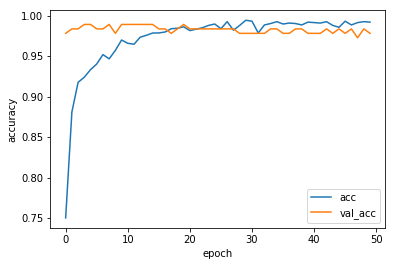

In [17]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

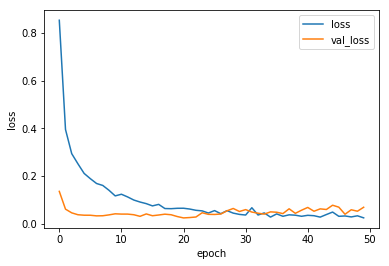

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, batch_size=32)
list(zip(model.metrics_names, score))

182/182 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 12ms/step


[('loss', 0.06940033956517844), ('acc', 0.978021978021978)]

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)

def plot_confusion_matrix(cm, breeds, normalize=False, title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
       
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
             
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breeds))
    plt.xticks(tick_marks, breeds, rotation=45)
    plt.yticks(tick_marks, breeds)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Confusion matrix, without normalization


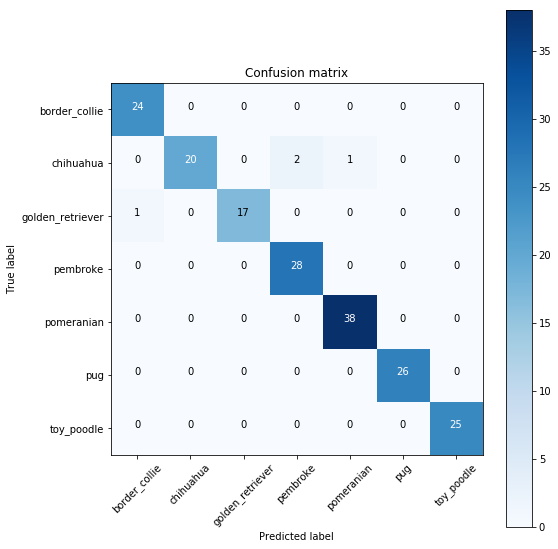

In [21]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_mtx, breeds)

border_collie


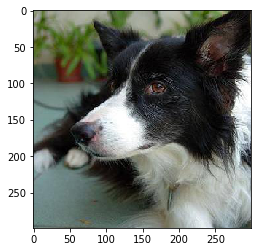

In [22]:
test_index = 10
rcParams['figure.figsize'] = (4, 4)

plt.imshow(X[test_index, :, :, :])
test_img = np.reshape(X[test_index, :, :, :], (1, INPUT_SIZE, INPUT_SIZE, 3))

predict = model.predict(test_img)
print(breeds[np.argmax(predict)])

In [23]:
model.save('model.h5')